# Try out classifiers on iris data set & plot outcomes

## Setting up: packages & data

In [1]:
# show matplotlib plots nicely
%matplotlib inline
import matplotlib.pyplot as plt

# import mglearn
import mglearn

import pandas as pd

import numpy as np

In [2]:
# get iris data

from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
# just to check that stuff is working

print(iris_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
# split data into train & test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [5]:
# define ML model - knn with n_neighbors=1

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [6]:
# fit model

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [7]:
# check model performance at predicting with test data

knn.score(X_test, y_test)

0.9736842105263158

In [8]:
target_series = pd.Series(iris_dataset['target'])
target_series

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int64

In [9]:
# filter data to leave just two features and just two plant classes

# join X and y into one pandas df
all_data = pd.DataFrame(iris_dataset['data'])
all_data.insert(4, 'target', target_series)
all_data

# extract two features (0 and 1)
two_features = all_data.iloc[:, [0, 1, -1]]
two_features

# extract only two classes of iris plants (0 and 1)
two_f_two_c = two_features.loc[two_features['target'].isin([0,1])]
two_f_two_c

# all four features, tow classes of iris plants
four_f_two_c = all_data.loc[two_features['target'].isin([0,1])]
four_f_two_c

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [10]:
X = two_f_two_c.iloc[:, :-1].to_numpy()
y = two_f_two_c['target'].to_numpy()


display(X)
display(y)

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Plotting: how knn classifier depends on n_neighbors

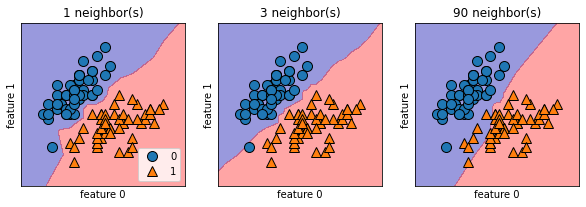

In [11]:
# make plots that show how knn behaviour depends on n_neighbors

neighbor_values = [1, 3, 90]

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip(neighbor_values, axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel('feature 1')
axes[0].legend(loc=4)

## Plotting: examples of SVM & LogisticRegression classifiers

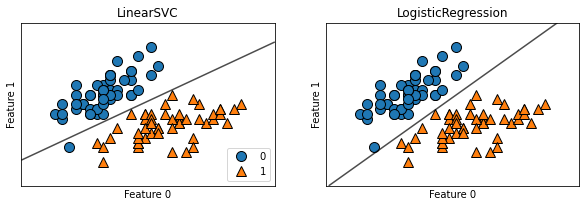

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend(loc=4)

## Plotting: how SVM classifier depends on C

/home/bkotryna/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


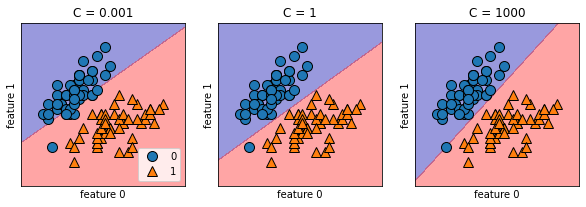

In [13]:
c_values = [0.001, 1, 1000]

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for c_value, ax in zip(c_values, axes):
    clf = LinearSVC(C = c_value).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=ax)
    ax.set_title("C = {}".format(c_value))
    ax.set_xlabel("feature 0")
    ax.set_ylabel('feature 1')
axes[0].legend(loc=4)

## Plotting: how LogisticRegression classifier depends on C

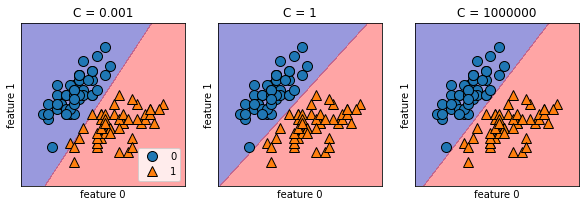

In [14]:
c_values = [0.001, 1, 1000000]

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for c_value, ax in zip(c_values, axes):
    clf = LogisticRegression(C = c_value).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=ax)
    ax.set_title("C = {}".format(c_value))
    ax.set_xlabel("feature 0")
    ax.set_ylabel('feature 1')
axes[0].legend(loc=4)

## Try out different classifiers & see which ones predict best

In [15]:
# BTW use the full iris dataset
# iris_dataset

In [38]:
# knn
print("knn\n")

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier

neighbours = [1, 3, 5, 10]

for neighbour_no in neighbours:
    clf = model(n_neighbors=neighbour_no).fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("For {} neighbours,\tthe train score is {:.2f} and the test score is {:.2f}.".format(
        neighbour_no, train_score, test_score))   

knn

For 1 neighbours,	the train score is 1.00 and the test score is 0.97.
For 3 neighbours,	the train score is 0.96 and the test score is 0.97.
For 5 neighbours,	the train score is 0.97 and the test score is 0.97.
For 10 neighbours,	the train score is 0.97 and the test score is 0.97.


In [53]:
# logistic regression
print("Logistic regression\n")

from sklearn.linear_model import LogisticRegression
model = LogisticRegression

c_values = [1]

for c_value in c_values:
    clf = model(C = c_value).fit(X_train, y_train)
    
    test_predictions = clf.predict(X_test)
    print(test_predictions)
    
    test_prob = clf.predict_proba(X_test)
    print(test_prob)
    
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("For C value of {},\tthe train score is {:.2f} and the test score is {:.2f}.".format(
        c_value, train_score, test_score))  

Logistic regression

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
[[1.17926066e-04 5.61482720e-02 9.43733802e-01]
 [1.26287990e-02 9.60455321e-01 2.69158796e-02]
 [9.84397687e-01 1.56022746e-02 3.85683093e-08]
 [1.25184625e-06 2.31536364e-02 9.76845112e-01]
 [9.70234641e-01 2.97651964e-02 1.62620367e-07]
 [2.01672863e-06 5.94455596e-03 9.94053427e-01]
 [9.81899422e-01 1.81005075e-02 7.04528141e-08]
 [2.84241887e-03 7.47089212e-01 2.50068369e-01]
 [1.50915990e-03 7.38525752e-01 2.59965088e-01]
 [2.05287681e-02 9.35890967e-01 4.35802646e-02]
 [9.22454485e-05 1.59478652e-01 8.40429103e-01]
 [6.98628867e-03 8.09987640e-01 1.83026071e-01]
 [4.08220833e-03 7.93603381e-01 2.02314411e-01]
 [3.05682287e-03 7.60911461e-01 2.36031716e-01]
 [3.87700546e-03 7.10277137e-01 2.85845858e-01]
 [9.82815522e-01 1.71844211e-02 5.65532077e-08]
 [6.72902102e-03 7.56464814e-01 2.36806165e-01]
 [1.14291701e-02 8.45111483e-01 1.43459347e-01]
 [9.67581865e-01 3.24179203e-02 2.14

/home/bkotryna/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
# support vector machine
print("Support vector machine\n")

from sklearn.svm import LinearSVC
model = LinearSVC

c_values = [0.01, 1, 10, 100]

for c_value in c_values:
    clf = model(C = c_value, random_state=0).fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("For C value of {},\tthe train score is {:.2f} and the test score is {:.2f}.".format(
        c_value, train_score, test_score))  

Support vector machine

For C value of 0.01,	the train score is 0.70 and the test score is 0.58.
For C value of 1,	the train score is 0.98 and the test score is 0.92.
For C value of 10,	the train score is 0.98 and the test score is 0.95.
For C value of 100,	the train score is 0.94 and the test score is 0.92.


/home/bkotryna/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/bkotryna/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/bkotryna/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [43]:
# Decission tree
print("Decision tree\n")

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier

depths = [1, 2, 8, 32]

for max_depth in depths:
    clf = model(max_depth = max_depth, random_state=0).fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("For max_depth of {},\tthe train score is {:.2f} and the test score is {:.2f}.".format(
        max_depth, train_score, test_score)) 

Decision tree

For max_depth of 1,	the train score is 0.70 and the test score is 0.58.
For max_depth of 2,	the train score is 0.96 and the test score is 0.89.
For max_depth of 8,	the train score is 1.00 and the test score is 0.97.
For max_depth of 32,	the train score is 1.00 and the test score is 0.97.


In [49]:
# Gradient boosted regression tree
print("Gradient boosted tree\n")

from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier

# try out different learning rates
print("Learning rates\n")
learning_rates = [0.001, 0.01, 0.1, 1]

for learning_rate in learning_rates:
    clf = model(learning_rate = learning_rate, random_state=0).fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("For learning_rate of {},\tthe train score is {:.2f} and the test score is {:.2f}.".format(
        learning_rate, train_score, test_score)) 
    
# try out different depths
print("\nMax depths\n")
depths = [1, 2, 8, 32]

for max_depth in depths:
    clf = model(max_depth = max_depth, random_state=0).fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("For max_depth of {},\tthe train score is {:.2f} and the test score is {:.2f}.".format(
        max_depth, train_score, test_score)) 

Gradient boosted regression tree

Learning rates

For learning_rate of 0.001,	the train score is 0.98 and the test score is 0.97.
For learning_rate of 0.01,	the train score is 1.00 and the test score is 0.97.
For learning_rate of 0.1,	the train score is 1.00 and the test score is 0.97.
For learning_rate of 1,	the train score is 1.00 and the test score is 0.97.

Max depths

For max_depth of 1,	the train score is 1.00 and the test score is 0.97.
For max_depth of 2,	the train score is 1.00 and the test score is 0.97.
For max_depth of 8,	the train score is 1.00 and the test score is 0.97.
For max_depth of 32,	the train score is 1.00 and the test score is 0.97.


In [51]:
# Random forest
print("Random forest\n")

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier

# try out different number of trees
print("Number of trees\n")
estimators = [10, 100, 1000]

for n_estimators in estimators:
    clf = model(n_estimators = n_estimators, random_state=0).fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("For n_estimators of {},\tthe train score is {:.2f} and the test score is {:.2f}.".format(
        n_estimators, train_score, test_score)) 
    
    
# try out different number of features
print("Number of features\n")
features = [1, 2, 3]

for max_features in features:
    clf = model(max_features = max_features, n_estimators = 2, random_state=0).fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("For max_features of {},\tthe train score is {:.2f} and the test score is {:.2f}.".format(
        max_features, train_score, test_score)) 

Random forest

Number of trees

For n_estimators of 10,	the train score is 1.00 and the test score is 0.97.
For n_estimators of 100,	the train score is 1.00 and the test score is 0.97.
For n_estimators of 1000,	the train score is 1.00 and the test score is 0.97.
Number of features

For max_features of 1,	the train score is 0.96 and the test score is 0.97.
For max_features of 2,	the train score is 0.95 and the test score is 0.92.
For max_features of 3,	the train score is 0.97 and the test score is 0.97.


In [57]:
# k means clustering

from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0, max_iter=300, n_init=10)
# n_init => pick the one with the best result (eg "smallest clusters")


model.fit(X_train)
print(model.cluster_centers_)

assignments = model.predict(X_train)
print(assignments)

print(y_train)

[[6.90588235 3.09705882 5.70294118 2.07058824]
 [4.9972973  3.38918919 1.45405405 0.24054054]
 [5.84390244 2.7097561  4.32926829 1.40731707]]
[2 2 0 1 0 1 1 2 0 0 2 0 2 0 2 2 2 2 2 2 0 0 2 1 2 2 2 2 2 0 1 1 0 2 1 1 0
 1 2 2 1 2 0 2 1 0 0 0 0 1 1 0 0 1 0 1 2 0 1 1 0 1 1 1 2 0 0 1 1 1 2 2 1 1
 2 1 0 2 0 2 1 2 1 0 1 1 0 1 0 2 2 2 0 0 2 0 1 2 0 2 1 2 2 2 2 1 1 1 0 2 0
 1]
[1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1
 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0
 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2
 0]


In [65]:
# PCA

from sklearn.decomposition import PCA
model = PCA(n_components = 2)

model.fit(X_train)

#print(model.components_)

datapoints_new_coord = model.transform(X_train)
reconstruction = model.inverse_transform(datapoints_new_coord)
#print (X_train[0:4], '\n', reconstruction[0:4])

print(model.explained_variance_ratio_)
print(model.explained_variance_)

[0.92743115 0.05245721]


## Variance

The population variance (σ2), is defined as the sum of the squared distances of each term in the distribution from the mean (μ), divided by the number of terms in the distribution (N). 

variance = Sum [ (x_i - x_mean)^2 ] / n

## Non-negative matrix factorisation

Non-negative Matrix Factorization (NMF) is a state of the art feature extraction algorithm. NMF is useful when there are many attributes and the attributes are ambiguous or have weak predictability. By combining attributes, NMF can produce meaningful patterns, topics, or themes.<br>

NMF is often useful in text mining. In a text document, the same word can occur in different places with different meanings. For example, "hike" can be applied to the outdoors or to interest rates. By combining attributes, NMF introduces context, which is essential for predictive power:<br>

"hike" + "mountain" -> "outdoor sports"<br>
"hike" + "interest" -> "interest rates"<br><br>

NMF decomposes multivariate data by creating a user-defined number of features. Each feature is a linear combination of the original attribute set; the coefficients of these linear combinations are non-negative.<br>

NMF decomposes a data matrix V into the product of two lower rank matrices W and H so that V is approximately equal to W times H. NMF uses an iterative procedure to modify the initial values of W and H so that the product approaches V. The procedure terminates when the approximation error converges or the specified number of iterations is reached.<br>

During model apply, an NMF model maps the original data into the new set of attributes (features) discovered by the model.

In [66]:
from platform import python_version

print(python_version())

3.8.3


In [67]:
!conda list

# packages in environment at /home/bkotryna/anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py38_0  
_libgcc_mutex             0.1                        main    conda-forge
alabaster                 0.7.12                     py_0    conda-forge
anaconda                  2020.07                  py38_0  
anaconda-client           1.7.2                    py38_0  
anaconda-navigator        1.9.12                   py38_0  
anaconda-project          0.8.4                      py_0  
argh                      0.26.2                   py38_0  
asn1crypto                1.3.0                    py38_0    conda-forge
astroid                   2.4.2                    py38_0  
astropy                   4.0.1.post1      py38h7b6447c_1  
atomicwrites              1.4.0                      py_0  
attrs                     19.3.0                     py_0    conda-forge
autopep8                  1.5.3             

In [1]:
# done
# !conda update nltk --yes

Solving environment: done

## Package Plan ##

  environment location: /home/bkotryna/anaconda3

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |             main           3 KB
    alabaster-0.7.12           |             py_0          16 KB
    asn1crypto-1.3.0           |           py38_0         164 KB
    backports-1.0              |             py_2         160 KB
    backports.functools_lru_cache-1.6.1|     pyhd3eb1b0_0          12 KB
    chardet-3.0.4              |        py38_1003         174 KB
    conda-4.9.2                |   py38h06a4308_0         2.9 MB
    conda-package-handling-1.7.2|   py38h03888b9_0         886 KB
    contextlib2-0.6.0.post1    |             py_0          16 KB
    decorator-4.4.2            |             py_0          14 KB
    defusedxml-0.6.0           |             py_0          23 